In [1]:
# Importing libraries

from pycaret.datasets import get_data
from pycaret.classification import *

from sklearn.model_selection import train_test_split

In [2]:
# Diabetes loaded data

diabetes = get_data("diabetes")

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Basic Statistics

diabetes.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# % of people with diabetes

100 * len(diabetes.loc[diabetes["Class variable"] == 1])/len(diabetes)

34.895833333333336

In [5]:
# Basic accuracy metric for the model

100 - (100 * len(diabetes.loc[diabetes["Class variable"] == 1])/len(diabetes))

65.10416666666666

In [6]:
# Separating X_train and X_test
# Pycaret already make Cross Validation

X_train, X_test = train_test_split(diabetes, test_size=0.2)

print(f"Train Data: {X_train.shape}")
print(f"Test Data: {X_test.shape}")

Train Data: (614, 9)
Test Data: (154, 9)


In [7]:
# First experimentation with the dataset
exp_01 = setup(data = X_train, target = "Class variable", session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(614, 9)"
4,Transformed data shape,"(614, 9)"
5,Transformed train set shape,"(429, 9)"
6,Transformed test set shape,"(185, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [8]:
# Second experimentation with the dataset
exp_02 = setup(data = X_train, target = "Class variable", session_id = 123, numeric_features=["Number of times pregnant"])

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(614, 9)"
4,Transformed data shape,"(614, 9)"
5,Transformed train set shape,"(429, 9)"
6,Transformed test set shape,"(185, 9)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:02:31
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7809,0.8129,0.6112,0.7315,0.6622,0.5025,0.5095,0.0310
lda,Linear Discriminant Analysis,0.7787,0.8263,0.5792,0.7411,0.6441,0.4889,0.5003,0.0050
ridge,Ridge Classifier,0.7763,0.0000,0.5725,0.7396,0.6392,0.4828,0.4948,0.0050
lr,Logistic Regression,0.7717,0.8282,0.5792,0.7223,0.6376,0.4754,0.4847,0.0080
et,Extra Trees Classifier,0.7716,0.8142,0.5654,0.7285,0.6302,0.4710,0.4823,0.0270
gbc,Gradient Boosting Classifier,0.7647,0.8091,0.6046,0.6930,0.6410,0.4685,0.4737,0.0180
nb,Naive Bayes,0.7576,0.8165,0.5979,0.6852,0.6340,0.4549,0.4604,0.0050
lightgbm,Light Gradient Boosting Machine,0.7482,0.7876,0.5842,0.6614,0.6159,0.4309,0.4355,0.0550
qda,Quadratic Discriminant Analysis,0.7436,0.8037,0.5646,0.6707,0.6065,0.4195,0.4271,0.0050
ada,Ada Boost Classifier,0.7368,0.7953,0.5721,0.6428,0.5997,0.4064,0.4110,0.0170


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [14]:
exp_03 = setup(data = X_train, target = "Class variable", session_id = 123, numeric_features=["Number of times pregnant"], polynomial_features=True)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(614, 9)"
4,Transformed data shape,"(614, 45)"
5,Transformed train set shape,"(429, 45)"
6,Transformed test set shape,"(185, 45)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7717,0.8256,0.5912,0.7249,0.6425,0.4791,0.4902,0.0390
gbc,Gradient Boosting Classifier,0.7693,0.8116,0.6246,0.7013,0.6549,0.4835,0.4892,0.0660
et,Extra Trees Classifier,0.7693,0.8104,0.5979,0.7194,0.6472,0.4783,0.4872,0.0340
lightgbm,Light Gradient Boosting Machine,0.7669,0.7877,0.5992,0.7004,0.6370,0.4698,0.4780,0.0580
lr,Logistic Regression,0.7601,0.7720,0.5588,0.6954,0.6128,0.4457,0.4537,0.0270
qda,Quadratic Discriminant Analysis,0.7554,0.7782,0.6113,0.6751,0.6362,0.4535,0.4586,0.0090
lda,Linear Discriminant Analysis,0.7553,0.7854,0.5525,0.6999,0.6098,0.4373,0.4481,0.0060
ridge,Ridge Classifier,0.7552,0.0000,0.5458,0.7065,0.6029,0.4338,0.4485,0.0070
nb,Naive Bayes,0.7529,0.8105,0.5788,0.6887,0.6232,0.4421,0.4504,0.0070
ada,Ada Boost Classifier,0.7390,0.7761,0.5725,0.6596,0.6046,0.4128,0.4206,0.0250


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [18]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7717,0.8256,0.5912,0.7249,0.6425,0.4791,0.4902,0.0330
gbc,Gradient Boosting Classifier,0.7693,0.8116,0.6246,0.7013,0.6549,0.4835,0.4892,0.0620
et,Extra Trees Classifier,0.7693,0.8104,0.5979,0.7194,0.6472,0.4783,0.4872,0.0250
lightgbm,Light Gradient Boosting Machine,0.7669,0.7877,0.5992,0.7004,0.6370,0.4698,0.4780,0.0530
lr,Logistic Regression,0.7601,0.7720,0.5588,0.6954,0.6128,0.4457,0.4537,0.0210
qda,Quadratic Discriminant Analysis,0.7554,0.7782,0.6113,0.6751,0.6362,0.4535,0.4586,0.0100
lda,Linear Discriminant Analysis,0.7553,0.7854,0.5525,0.6999,0.6098,0.4373,0.4481,0.0060
ridge,Ridge Classifier,0.7552,0.0000,0.5458,0.7065,0.6029,0.4338,0.4485,0.0060
nb,Naive Bayes,0.7529,0.8105,0.5788,0.6887,0.6232,0.4421,0.4504,0.0060
ada,Ada Boost Classifier,0.7390,0.7761,0.5725,0.6596,0.6046,0.4128,0.4206,0.0220


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [19]:
# Hyperparameter tunning
tunned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7674,0.9097,0.7500,0.6667,0.7059,0.5147,0.5171
1,0.7907,0.8380,0.8125,0.6842,0.7429,0.5686,0.5745
2,0.7209,0.7214,0.5333,0.6154,0.5714,0.3661,0.3682
3,0.7907,0.8333,0.8000,0.6667,0.7273,0.5597,0.5659
4,0.8372,0.9333,0.8667,0.7222,0.7879,0.6576,0.6648
5,0.8372,0.8619,0.6667,0.8333,0.7407,0.6242,0.6325
6,0.6977,0.8214,0.4667,0.5833,0.5185,0.3021,0.3061
7,0.6512,0.7190,0.6667,0.5000,0.5714,0.2873,0.2958
8,0.8140,0.9095,0.7333,0.7333,0.7333,0.5905,0.5905


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


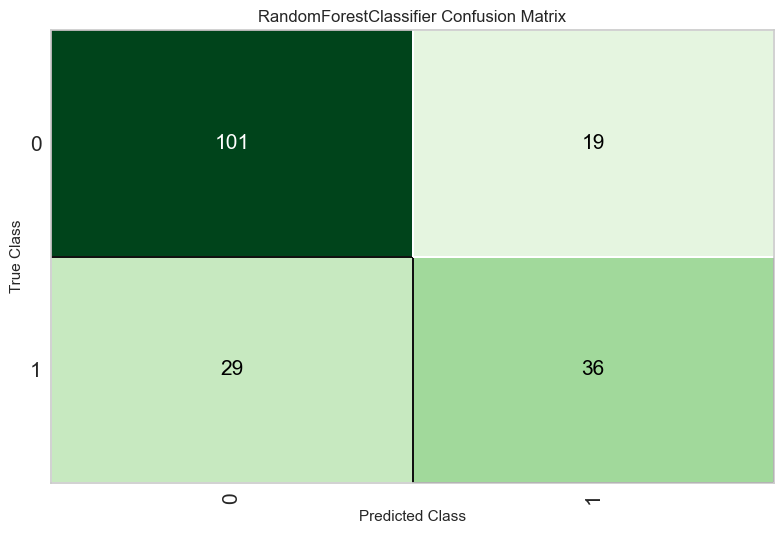

In [24]:
# Confusion matrix
plot_model(tunned_model, plot = 'confusion_matrix')

In [25]:
# Selecting best model
final_model = finalize_model(tunned_model)

In [27]:
# Predicted values
predicted = predict_model(final_model, X_test)
predicted

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7208,0.7915,0.4706,0.6000,0.5275,0.3334,0.3384


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
79,2,112,66,22,0,25.000000,0.307,24,0,0,0.97
359,1,196,76,36,249,36.500000,0.875,29,1,1,0.83
157,1,109,56,21,135,25.200001,0.833,23,0,0,0.98
158,2,88,74,19,53,29.000000,0.229,22,0,0,0.99
576,6,108,44,20,130,24.000000,0.813,35,0,0,0.76
...,...,...,...,...,...,...,...,...,...,...,...
677,0,93,60,0,0,35.299999,0.263,25,0,0,0.92
152,9,156,86,28,155,34.299999,1.189,42,1,1,0.92
511,0,139,62,17,210,22.100000,0.207,21,0,0,0.88
285,7,136,74,26,135,26.000000,0.647,51,0,0,0.52


In [29]:
# Right predictions
predict_right = (predicted["Class variable"] == predicted["prediction_label"]).astype(int).sum()
predict_right

111

In [30]:
# Calculating accuracy
acc = 100 * predict_right / len(X_test) 
acc

72.07792207792208